In [2]:

import numpy as np 
import plotly.express as px 
import scipy.stats as stats
import matplotlib.pyplot as plt 
import plotly.graph_objects as go 


In [2]:


mu = 30
std = 100
data = np.linspace(-600,600,500)
norm_pdf = stats.norm.pdf(data,mu,std)

fig = px.line(x=data,y=norm_pdf)

fig.update_traces(
    mode="lines+markers",
    name="Normal Distribution PDF",
    line=dict(width=3,dash="solid"),
    showlegend=True,
)

fig.update_layout(
    xaxis = dict(title='x-axis-values',showgrid=False),
    yaxis = dict(title='pdf-values',showgrid=False),
    plot_bgcolor='black',
)
fig.show()



In [ ]:

#
# ------ Animation with  play button --------
#


#
# for animation: we need 3 steps:
# - anitial plot (1st draw the plot)
# - frames  (make the changes for animation)
# - updatemenu (play-button)
#

mu = 10
std = 100
data = np.linspace(-600,600,500)
norm_pdf = stats.norm.pdf(data,mu,std)

trace1 = go.Scatter(x=data,y=norm_pdf,mode='lines',name="Normal-Distribution",
                    line=dict(width=4,color='green'))

trace2 = go.Scatter(x=data,y=norm_pdf,mode='lines',
                    name="Normal-Distribution mu: 10 std: 100",
                    line=dict(color="red",dash="dash"))

initial_line_x = [mu,mu] 
initial_line_y = [norm_pdf.min(),norm_pdf.max()]
trace3 = go.Scatter(x=initial_line_x,y=initial_line_y,mode='lines',
                    line=dict(color='red',dash="dash"),
                    name="mu=10")
traces = [trace1,trace2,trace3]


frames = []
for mu in range(-80,80,10):
    y = stats.norm.pdf(data,mu,std)
    frames.append(
        go.Frame(
            data=[go.Scatter(y=y)],
            name=str(mu)
        )
    )


layout = go.Layout(yaxis=dict(title="y-axis",
                            showgrid=False),
                   xaxis=dict(title="x-axis",
                              showgrid=False),
                   plot_bgcolor='black',
                   title=dict(
                       text="Normal Distribution",
                       font=dict(color="green",size=30,textcase='upper'),
                       subtitle=dict(text="--If we change the mean of the normal distribution--")),
                   legend=dict(),
                   updatemenus=[dict(
                       type="buttons",
                       direction="down",
                       buttons=[dict(args=[
                                    None, # run all the frame 
                                    {
                                    "frame": {"duration": 100, "redraw": True},
                                    "transition": {"duration": 100},
                                    "fromcurrent": True}
                                    ],
                                    label="Play",
                                    method="animate")])],
                   showlegend=True)

fig = go.Figure(data=traces,layout=layout,frames=frames)
fig.update_xaxes(zerolinecolor="red")
fig.update_xaxes(zeroline=False)
fig.update_yaxes(zeroline=False)
fig.show()




In [24]:

mu = 10 
std = 60

x = np.linspace(-800,800,1000)
y = stats.norm.pdf(x,mu,std)


initial_line_x = [mu,mu]
initial_line_y = [y.min(),y.max()]

trace1  = go.Scatter(x=x,y=y,mode='lines',name="Normal Distribution",
                     line=dict(color='red',width=4))

trace2  = go.Scatter(x=x,y=y,mode='lines',name="Normal Distribution mu=10 std=60",
                     line=dict(color="red",dash='dash'))

trace3 = go.Scatter(x=initial_line_x,y=initial_line_y,name="mu_line",
                    line=dict(color='red',dash='dash'))

trace4 = go.Scatter(x=initial_line_x,y=initial_line_y,name=f"mu_line: {mu}",
                    line=dict(color='red',width=4))


traces = [trace1,trace2,trace3,trace4]


mu_values = range(-100,100,10)


#frame: 
frames = []
for mu in mu_values:
    y = stats.norm.pdf(x,mu,std)
    initial_line_x = [mu,mu]
    frames.append(
        go.Frame(
            data=[go.Scatter(y=y,name=f"Normal Distribution: {mu}"),
                  go.Scatter(x=initial_line_x,name=f"mu_values: {mu}")
                  ],
            name=str(mu),
            traces=[0,3]
        )
    )


#slider for mu:
slider_mu = [
    dict(
        method="animate",
        args=[[str(mu)],
            dict(
                mode="immediate",
                frame=dict(
                    duration=200,
                    redraw=True
                ),
                transition=dict(duration=0)
            )
        ],
        label=f"mu: {str(mu)}"
    )
    for mu in mu_values
]



layout = go.Layout(
    template='plotly_dark',
    xaxis=dict(title="x-axis",showgrid=False),
    yaxis=dict(title='y-axis',showgrid=False),
    title=dict(
        text = "Normal Distribution With Slider",
        font=dict(size=30,weight=500)
        ),
    plot_bgcolor="black",
    sliders=[
        dict(
            active=mu_values.index(mu),
            steps=slider_mu,
            x=0.1,
            y=-0.1,
            len=0.8
        )
    ],
    
    font=dict(size=15,color="red"),
    showlegend=True
)

fig = go.Figure(data=traces,layout=layout,frames=frames)
fig.update_xaxes(zeroline=False)
fig.update_yaxes(zeroline=False)
fig.show()



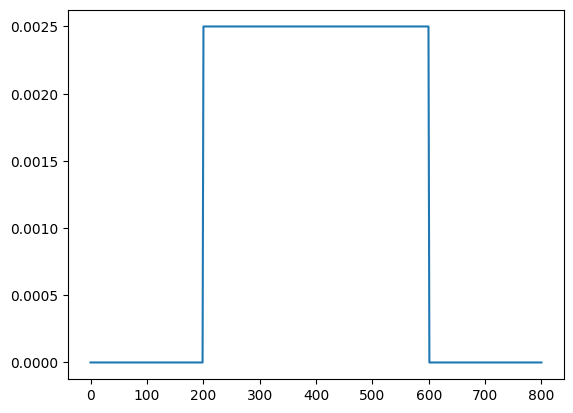

In [12]:

# ===== 1. Uniform Distribution =======
a = 200
b = 400
x = np.linspace(0,800,500)
uniform_stat = stats.uniform.pdf(x,a,b)

plt.plot(x,uniform_stat)
plt.show()

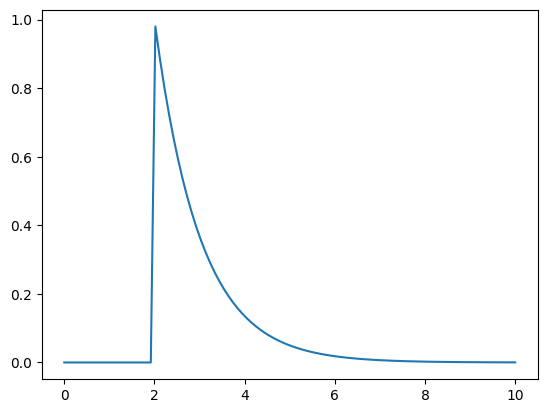

In [31]:

# exponential distribution:
beta = 2
x = np.linspace(0,10,100)
y = stats.expon.pdf(x,beta)
plt.plot(x,y)
plt.show()

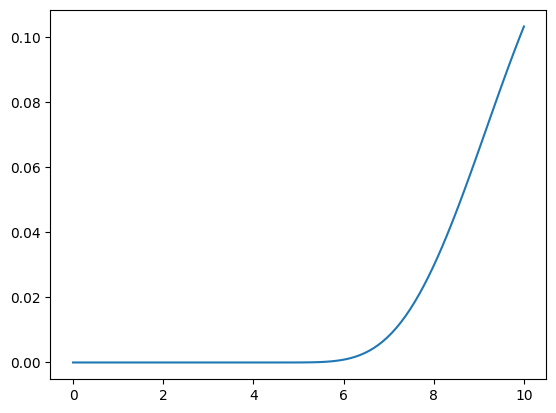

In [94]:

# gamma distribution:
alpha = 9 # >0
beta = 4
x = np.linspace(0,10,100)
y = stats.gamma.pdf(x,alpha,beta)
plt.plot(x,y)
plt.show()


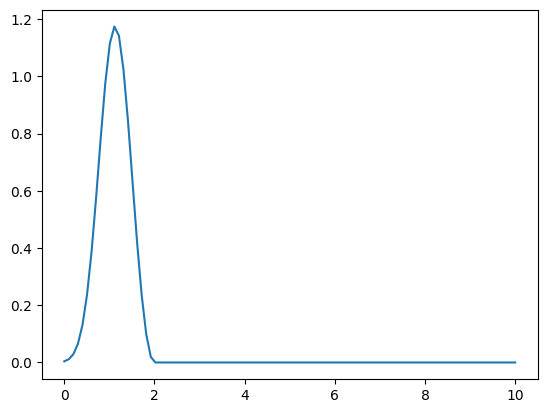

In [98]:


# weibull distribution: 
alpha = 3

# graph ke same  pisone 
beta = 2
x = np.linspace(0,10,100)
y = stats.weibull_max.pdf(x,alpha,beta)
plt.plot(x,y)
plt.show()

In [151]:

# ================== Bi-variate Normal Distribution ===================


from scipy.stats import multivariate_normal


# -------------------------
# Parameters
# -------------------------
mu_x, mu_y = 0, 0
sigma_x, sigma_y = 400, 300
rho = 0.6   

mean = [mu_x, mu_y]
cov = [
    [sigma_x**2, rho*sigma_x*sigma_y],
    [rho*sigma_x*sigma_y, sigma_y**2]
]


# -------------------------
# Grid
# -------------------------
x = np.linspace(-800, 800, 150)
y = np.linspace(-800, 800, 150)
X, Y = np.meshgrid(x, y)

pos = np.dstack((X, Y))

# -------------------------
# PDF
# -------------------------
rv = multivariate_normal(mean, cov)
Z = rv.pdf(pos)

# -------------------------
# Plotly 3D Surface
# -------------------------
fig = go.Figure(
    data=[
        go.Surface(
            x=X,
            y=Y,
            z=Z,
            colorscale="Viridis"
        )
    ]
)

fig.update_layout(
    title="3D Bivariate Normal Distribution",
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="PDF"
    ),
    width=800,
    height=700
)

fig.show()


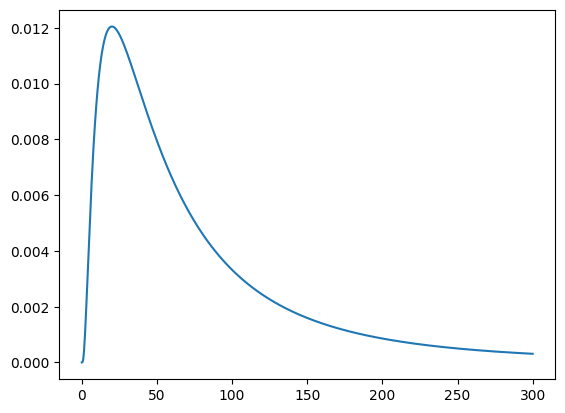

In [147]:


# Log-Normal Distribution:
mu = 4
sigma = 1 
x = np.linspace(0.01,300,1000)
y = stats.lognorm.pdf(x,s=sigma,scale=np.exp(mu))
plt.plot(x,y)
plt.show()


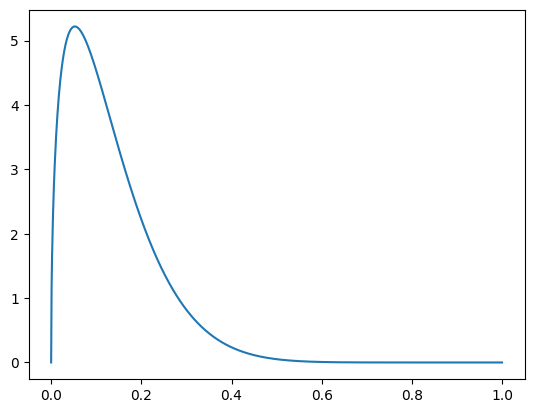

In [180]:


# beta distribution:
alpha1 = 1.5
alpha2 = 10
x = np.linspace(0,1,1000)
y = stats.beta.pdf(x,alpha1,alpha2)
plt.plot(x,y)
plt.show()



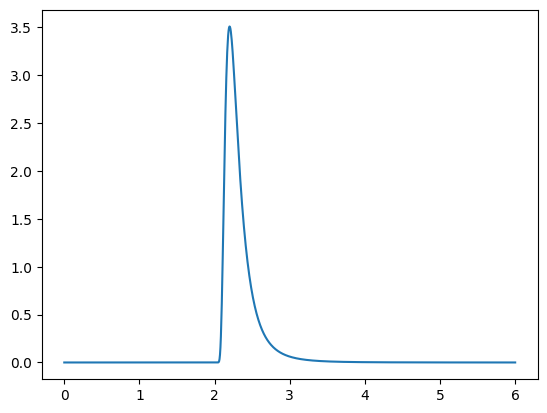

In [194]:

# pearson type5  distribution:
alpha = 4
beta = 2 
x = np.linspace(0,6,1000)
y = stats.invgamma.pdf(x,alpha,beta)
plt.plot(x,y)
plt.show()



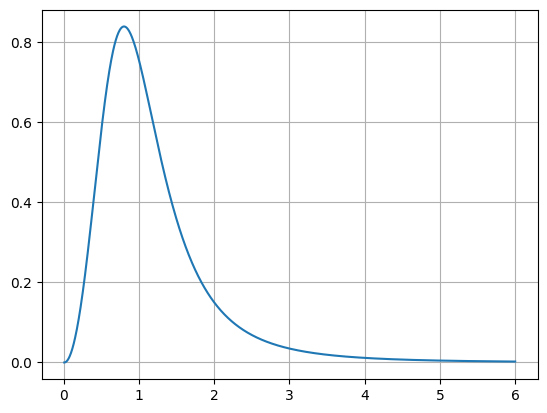

In [203]:


# log-logistics distribution:
alpha = 3
beta = 0.01
x = np.linspace(0.01,6,1000)
y = stats.fisk.pdf(x,alpha,beta)

plt.plot(x,y)
plt.grid()
plt.show()


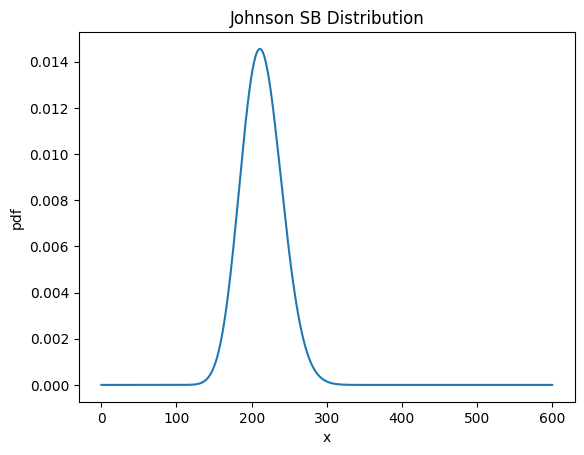

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

alpha1 = 3   # gamma
alpha2 = 5   # delta

lower = 0
upper = 600

x = np.linspace(lower + 1e-3, upper - 1e-3, 1000)

y = stats.johnsonsb.pdf(
    x,
    a=alpha1,
    b=alpha2,
    loc=lower,
    scale=upper - lower
)

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("pdf")
plt.title("Johnson SB Distribution")
plt.show()
